In [1]:
from os import path

import matplotlib.pyplot as plt

from cobra import DictList

from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io import json, sbml
from mass.util import qcqa_model
import altair as alt
from vega_datasets import data
import altair as alt
## lock this version of altair in requirements.txt
import pandas as pd
import numpy as np


mass_config = MassConfiguration()

mass_config.irreversible_Keq = float("inf")

## Creating model

In [2]:
glycolysis = MassModel("Glycolysis")

## Metabolites and reactions

In [3]:
glc__D_c = MassMetabolite(
    "glc__D_c",
    name="D-Glucose",
    formula="C6H12O6",
    charge=0,
    compartment="c",
    fixed=False)

g6p_c = MassMetabolite(
    "g6p_c",
    name="D-Glucose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

f6p_c = MassMetabolite(
    "f6p_c",
    name="D-Fructose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

fdp_c = MassMetabolite(
    "fdp_c",
    name="D-Fructose 1,6-bisphosphate",
    formula="C6H10O12P2",
    charge=-4,
    compartment="c",
    fixed=False)

dhap_c = MassMetabolite(
    "dhap_c",
    name="Dihydroxyacetone phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

g3p_c = MassMetabolite(
    "g3p_c",
    name="Glyceraldehyde 3-phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

_13dpg_c = MassMetabolite(
    "_13dpg_c",
    name="3-Phospho-D-glyceroyl phosphate",
    formula="C3H4O10P2",
    charge=-4,
    compartment="c",
    fixed=False)

_3pg_c = MassMetabolite(
    "_3pg_c",
    name="3-Phospho-D-glycerate",
    formula="C3H4O7P",
    charge=-3,
    compartment="c",
    fixed=False)

_2pg_c = MassMetabolite(
    "_2pg_c",
    name="D-Glycerate 2-phosphate",
    formula="C3H4O7P",
    charge=-3,
    compartment="c",
    fixed=False)

pep_c = MassMetabolite(
    "pep_c",
    name="Phosphoenolpyruvate",
    formula="C3H2O6P",
    charge=-3,
    compartment="c",
    fixed=False)

pyr_c = MassMetabolite(
    "pyr_c",
    name="Pyruvate",
    formula="C3H3O3",
    charge=-1,
    compartment="c",
    fixed=False)

lac__L_c = MassMetabolite(
    "lac__L_c",
    name="L-Lactate",
    formula="C3H5O3",
    charge=-1,
    compartment="c",
    fixed=False)

nad_c = MassMetabolite(
    "nad_c",
    name="Nicotinamide adenine dinucleotide",
    formula="[NAD]-C21H26N7O14P2",
    charge=-1,
    compartment="c",
    fixed=False)

nadh_c = MassMetabolite(
    "nadh_c",
    name="Nicotinamide adenine dinucleotide - reduced",
    formula="[NAD]-C21H27N7O14P2",
    charge=-2,
    compartment="c",
    fixed=False)

atp_c = MassMetabolite(
    "atp_c",
    name="ATP",
    formula="C10H12N5O13P3",
    charge=-4,
    compartment="c",
    fixed=False)

adp_c = MassMetabolite(
    "adp_c",
    name="ADP",
    formula="C10H12N5O10P2",
    charge=-3,
    compartment="c",
    fixed=False)

amp_c = MassMetabolite(
    "amp_c",
    name="AMP",
    formula="C10H12N5O7P",
    charge=-2,
    compartment="c",
    fixed=False)

pi_c = MassMetabolite(
    "pi_c",
    name="Phosphate",
    formula="HPO4",
    charge=-2,
    compartment="c",
    fixed=False)

h_c = MassMetabolite(
    "h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c",
    fixed=False)

h2o_c = MassMetabolite(
    "h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c",
    fixed=False)

In [4]:
HEX1 = MassReaction(
    "HEX1",
    name="Hexokinase (D-glucose:ATP)",
    subsystem=glycolysis.id,
    reversible=True)
HEX1.add_metabolites({
    glc__D_c: -1,
    atp_c: -1,
    adp_c: 1,
    g6p_c: 1,
    h_c: 1})

PGI = MassReaction(
    "PGI",
    name="Glucose-6-phosphate isomerase",
    subsystem=glycolysis.id,
    reversible=True)
PGI.add_metabolites({
    g6p_c: -1,
    f6p_c: 1})

PFK = MassReaction(
    "PFK",
    name="Phosphofructokinase",
    subsystem=glycolysis.id,
    reversible=True)
PFK.add_metabolites({
    f6p_c: -1,
    atp_c: -1,
    fdp_c: 1,
    adp_c: 1,
    h_c: 1})

FBA = MassReaction(
    "FBA",
    name="Fructose-bisphosphate aldolase",
    subsystem=glycolysis.id,
    reversible=True)
FBA.add_metabolites({
    fdp_c: -1,
    dhap_c: 1,
    g3p_c: 1})

TPI = MassReaction(
    "TPI",
    name="Triose-phosphate isomerase",
    subsystem=glycolysis.id,
    reversible=True)
TPI.add_metabolites({
    dhap_c: -1,
    g3p_c: 1})

GAPD = MassReaction(
    "GAPD",
    name="Glyceraldehyde-3-phosphate dehydrogenase",
    subsystem=glycolysis.id,
    reversible=True)
GAPD.add_metabolites({
    g3p_c: -1,
    nad_c: -1,
    pi_c: -1,
    _13dpg_c: 1,
    h_c: 1,
    nadh_c: 1})

PGK = MassReaction(
    "PGK",
    name="Phosphoglycerate kinase",
    subsystem=glycolysis.id,
    reversible=True)
PGK.add_metabolites({
    _13dpg_c: -1,
    adp_c: -1,
    _3pg_c: 1,
    atp_c: 1})

PGM = MassReaction(
    "PGM",
    name="Phosphoglycerate mutase",
    subsystem=glycolysis.id,
    reversible=True)
PGM.add_metabolites({
    _3pg_c: -1,
    _2pg_c: 1})

ENO = MassReaction(
    "ENO",
    name="Enolase",
    subsystem=glycolysis.id,
    reversible=True)
ENO.add_metabolites({
    _2pg_c: -1,
    h2o_c: 1,
    pep_c: 1})

PYK = MassReaction(
    "PYK",
    name="Pyruvate kinase",
    subsystem=glycolysis.id,
    reversible=True)
PYK.add_metabolites({
    pep_c: -1,
    h_c: -1,
    adp_c: -1,
    atp_c: 1,
    pyr_c: 1})

LDH_L = MassReaction(
    "LDH_L",
    name="L-lactate dehydrogenase",
    subsystem=glycolysis.id,
    reversible=True)
LDH_L.add_metabolites({
    h_c: -1,
    nadh_c: -1,
    pyr_c: -1,
    lac__L_c: 1,
    nad_c: 1})

ADK1 = MassReaction(
    "ADK1",
    name="Adenylate kinase",
    subsystem="Misc.",
    reversible=True)
ADK1.add_metabolites({
    adp_c: -2,
    amp_c: 1,
    atp_c: 1})

ATPM = MassReaction(
    "ATPM",
    name="ATP maintenance requirement",
    subsystem="Pseudoreaction",
    reversible=False)
ATPM.add_metabolites({
    atp_c: -1,
    h2o_c: -1,
    adp_c: 1,
    h_c: 1,
    pi_c: 1})

DM_nadh = MassReaction(
    "DM_nadh",
    name="Demand NADH",
    subsystem="Pseudoreaction",
    reversible=False)
DM_nadh.add_metabolites({
    nadh_c: -1,
    nad_c: 1,
    h_c: 1})

In [5]:
glycolysis.add_reactions([
    HEX1, PGI, PFK, FBA, TPI, GAPD, PGK,
    PGM, ENO, PYK, LDH_L, ADK1, ATPM, DM_nadh])

for reaction in glycolysis.reactions:
    print(reaction)

HEX1: atp_c + glc__D_c <=> adp_c + g6p_c + h_c
PGI: g6p_c <=> f6p_c
PFK: atp_c + f6p_c <=> adp_c + fdp_c + h_c
FBA: fdp_c <=> dhap_c + g3p_c
TPI: dhap_c <=> g3p_c
GAPD: g3p_c + nad_c + pi_c <=> _13dpg_c + h_c + nadh_c
PGK: _13dpg_c + adp_c <=> _3pg_c + atp_c
PGM: _3pg_c <=> _2pg_c
ENO: _2pg_c <=> h2o_c + pep_c
PYK: adp_c + h_c + pep_c <=> atp_c + pyr_c
LDH_L: h_c + nadh_c + pyr_c <=> lac__L_c + nad_c
ADK1: 2 adp_c <=> amp_c + atp_c
ATPM: atp_c + h2o_c --> adp_c + h_c + pi_c
DM_nadh: nadh_c --> h_c + nad_c


In [6]:
SK_glc__D_c = glycolysis.add_boundary(
    metabolite=glc__D_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_glc__D_c.reverse_stoichiometry(inplace=True)

SK_lac__L_c = glycolysis.add_boundary(
    metabolite=lac__L_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_pyr_c = glycolysis.add_boundary(
    metabolite=pyr_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=0.06)

SK_h_c = glycolysis.add_boundary(
    metabolite=h_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=6.30957e-05)

SK_h2o_c = glycolysis.add_boundary(
    metabolite=h2o_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_amp_c = glycolysis.add_boundary(
    metabolite=amp_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_amp_c.reverse_stoichiometry(inplace=True)

DM_amp_c = glycolysis.add_boundary(
    metabolite=amp_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

print("Boundary Reactions and Values\n-----------------------------")
for reaction in glycolysis.boundary:
    boundary_met = reaction.boundary_metabolite
    bc_value = glycolysis.boundary_conditions.get(boundary_met)
    print("{0}\n{1}: {2}\n".format(
        reaction, boundary_met, bc_value))

Boundary Reactions and Values
-----------------------------
SK_glc__D_c:  <=> glc__D_c
glc__D_b: 1.0

SK_lac__L_c: lac__L_c <=> 
lac__L_b: 1.0

SK_pyr_c: pyr_c <=> 
pyr_b: 0.06

SK_h_c: h_c <=> 
h_b: 6.30957e-05

SK_h2o_c: h2o_c <=> 
h2o_b: 1.0

SK_amp_c:  <=> amp_c
amp_b: 1.0

DM_amp_c: amp_c --> 
amp_b: 1.0



In [7]:
new_metabolite_order = [
    "glc__D_c", "g6p_c", "f6p_c", "fdp_c", "dhap_c",
    "g3p_c", "_13dpg_c", "_3pg_c", "_2pg_c", "pep_c",
    "pyr_c", "lac__L_c", "nad_c", "nadh_c", "amp_c",
    "adp_c", "atp_c", "pi_c", "h_c", "h2o_c"]

if len(glycolysis.metabolites) == len(new_metabolite_order):
    glycolysis.metabolites = DictList(
        glycolysis.metabolites.get_by_any(new_metabolite_order))

new_reaction_order = [
    "HEX1", "PGI", "PFK", "FBA", "TPI",
    "GAPD", "PGK", "PGM", "ENO", "PYK",
    "LDH_L", "DM_amp_c", "ADK1", "SK_pyr_c",
    "SK_lac__L_c", "ATPM", "DM_nadh", "SK_glc__D_c",
    "SK_amp_c", "SK_h_c", "SK_h2o_c"]

if len(glycolysis.reactions) == len(new_reaction_order):
    glycolysis.reactions = DictList(
        glycolysis.reactions.get_by_any(new_reaction_order))

glycolysis.update_S(array_type="DataFrame", dtype=int)

,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,...,DM_amp_c,ADK1,SK_pyr_c,SK_lac__L_c,ATPM,DM_nadh,SK_glc__D_c,SK_amp_c,SK_h_c,SK_h2o_c
glc__D_c,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
g6p_c,1,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f6p_c,0,1,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fdp_c,0,0,1,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dhap_c,0,0,0,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g3p_c,0,0,0,1,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_13dpg_c,0,0,0,0,0,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_3pg_c,0,0,0,0,0,0,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
_2pg_c,0,0,0,0,0,0,0,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
pep_c,0,0,0,0,0,0,0,0,1,-1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
minspan_paths = [
    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, -1, 0, 1, 0, 0, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
glycolysis.compute_steady_state_fluxes(
    pathways=minspan_paths,
    independent_fluxes={
        SK_glc__D_c: 1.12,
        DM_nadh: .2 * 1.12,
        DM_amp_c: 0.014},
    update_reactions=True)

print("Steady State Fluxes\n-------------------")
for reaction, steady_state_flux in glycolysis.steady_state_fluxes.items():
    print("{0}: {1:.6f}".format(reaction.flux_symbol_str, steady_state_flux))

Steady State Fluxes
-------------------
v_HEX1: 1.120000
v_PGI: 1.120000
v_PFK: 1.120000
v_FBA: 1.120000
v_TPI: 1.120000
v_GAPD: 2.240000
v_PGK: 2.240000
v_PGM: 2.240000
v_ENO: 2.240000
v_PYK: 2.240000
v_LDH_L: 2.016000
v_DM_amp_c: 0.014000
v_ADK1: 0.000000
v_SK_pyr_c: 0.224000
v_SK_lac__L_c: 2.016000
v_ATPM: 2.240000
v_DM_nadh: 0.224000
v_SK_glc__D_c: 1.120000
v_SK_amp_c: 0.014000
v_SK_h_c: 2.688000
v_SK_h2o_c: 0.000000


In [9]:
glycolysis.metabolites.glc__D_c.ic = 1.0
glycolysis.metabolites.g6p_c.ic = 0.0486
glycolysis.metabolites.f6p_c.ic = 0.0198
glycolysis.metabolites.fdp_c.ic = 0.0146
glycolysis.metabolites.g3p_c.ic = 0.00728
glycolysis.metabolites.dhap_c.ic = 0.16
glycolysis.metabolites._13dpg_c.ic = 0.000243
glycolysis.metabolites._3pg_c.ic = 0.0773
glycolysis.metabolites._2pg_c.ic = 0.0113
glycolysis.metabolites.pep_c.ic = 0.017
glycolysis.metabolites.pyr_c.ic = 0.060301
glycolysis.metabolites.lac__L_c.ic = 1.36
glycolysis.metabolites.atp_c.ic = 1.6
glycolysis.metabolites.adp_c.ic = 0.29
glycolysis.metabolites.amp_c.ic = 0.0867281
glycolysis.metabolites.h_c.ic = 0.0000899757
glycolysis.metabolites.nad_c.ic = 0.0589
glycolysis.metabolites.nadh_c.ic = 0.0301
glycolysis.metabolites.pi_c.ic = 2.5
glycolysis.metabolites.h2o_c.ic = 1.0

print("Initial Conditions\n------------------")
for metabolite, ic_value in glycolysis.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

Initial Conditions
------------------
glc__D_c: 1.0
g6p_c: 0.0486
f6p_c: 0.0198
fdp_c: 0.0146
dhap_c: 0.16
g3p_c: 0.00728
_13dpg_c: 0.000243
_3pg_c: 0.0773
_2pg_c: 0.0113
pep_c: 0.017
pyr_c: 0.060301
lac__L_c: 1.36
nad_c: 0.0589
nadh_c: 0.0301
amp_c: 0.0867281
adp_c: 0.29
atp_c: 1.6
pi_c: 2.5
h_c: 8.99757e-05
h2o_c: 1.0


In [10]:
glycolysis.reactions.HEX1.Keq = 850
glycolysis.reactions.PGI.Keq = 0.41
glycolysis.reactions.PFK.Keq = 310
glycolysis.reactions.FBA.Keq = 0.082
glycolysis.reactions.TPI.Keq = 0.0571429
glycolysis.reactions.GAPD.Keq = 0.0179
glycolysis.reactions.PGK.Keq = 1800
glycolysis.reactions.PGM.Keq = 0.147059
glycolysis.reactions.ENO.Keq = 1.69492
glycolysis.reactions.PYK.Keq = 363000
glycolysis.reactions.LDH_L.Keq = 26300
glycolysis.reactions.ADK1.Keq = 1.65

glycolysis.reactions.SK_glc__D_c.Keq = mass_config.irreversible_Keq
SK_lac__L_c.Keq = 1
SK_pyr_c.Keq = 1
SK_h_c.Keq = 1
SK_h2o_c.Keq = 1
SK_amp_c.Keq = mass_config.irreversible_Keq

print("Equilibrium Constants\n---------------------")
for reaction in glycolysis.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

Equilibrium Constants
---------------------
Keq_HEX1: 850
Keq_PGI: 0.41
Keq_PFK: 310
Keq_FBA: 0.082
Keq_TPI: 0.0571429
Keq_GAPD: 0.0179
Keq_PGK: 1800
Keq_PGM: 0.147059
Keq_ENO: 1.69492
Keq_PYK: 363000
Keq_LDH_L: 26300
Keq_DM_amp_c: inf
Keq_ADK1: 1.65
Keq_SK_pyr_c: 1
Keq_SK_lac__L_c: 1
Keq_ATPM: inf
Keq_DM_nadh: inf
Keq_SK_glc__D_c: inf
Keq_SK_amp_c: inf
Keq_SK_h_c: 1
Keq_SK_h2o_c: 1


In [11]:
glycolysis.calculate_PERCs(update_reactions=True)

print("Forward Rate Constants\n----------------------")
for reaction in glycolysis.reactions:
    print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

Forward Rate Constants
----------------------
kf_HEX1: 0.700007
kf_PGI: 3644.444444
kf_PFK: 35.368784
kf_FBA: 2834.567901
kf_TPI: 34.355728
kf_GAPD: 3376.749242
kf_PGK: 1273531.269741
kf_PGM: 4868.589299
kf_ENO: 1763.740525
kf_PYK: 454.385552
kf_LDH_L: 1112.573989
kf_DM_amp_c: 0.161424
kf_ADK1: 100000.000000
kf_SK_pyr_c: 744.186047
kf_SK_lac__L_c: 5.600000
kf_ATPM: 1.400000
kf_DM_nadh: 7.441860
kf_SK_glc__D_c: 1.120000
kf_SK_amp_c: 0.014000
kf_SK_h_c: 100000.000000
kf_SK_h2o_c: 100000.000000


In [12]:
qcqa_model(glycolysis, parameters=True, concentrations=True,
           fluxes=True, superfluous=True, elemental=True)



╒══════════════════════════════════════════════╕
│ MODEL ID: Glycolysis                         │
│ SIMULATABLE: True                            │
│ PARAMETERS NUMERICALY CONSISTENT: True       │
╞══════════════════════════════════════════════╡
│ ============================================ │
│             CONSISTENCY CHECKS               │
│ ============================================ │
│ Elemental                                    │
│ ----------------------                       │
│ DM_nadh: {charge: 2.0}                       │
│ ============================================ │
╘══════════════════════════════════════════════╛


In [13]:
conc_solution={}

In [14]:
from roadrunner import __version__
__version__

'2.0.0'

Successfully loaded MassModel 'Glycolysis' into RoadRunner.


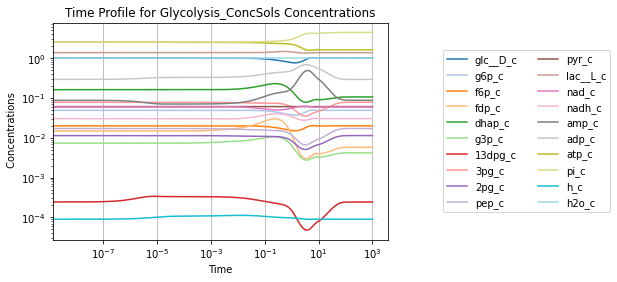

In [15]:
# Setup simulation object
sim = Simulation(glycolysis, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = sim.simulate(glycolysis, time=(0,1e3, 1e4 + 1),
                                 perturbations={"atp_c": 2.5}
                                 )
# Quickly render and display time profiles
conc_sol.view_time_profile()



In [16]:
# conc_sol.time = np.linspace(0, 1000, int(1e2))
# conc_sol.interpolate = False

## Making function to see time profile

In [33]:
def view_all_conc_sol(conc_sol, interactive=True):
    """Generate an interactable time profile which can zoom into the plot with interactive tooltip"""
    
    data=conc_sol.to_frame()
    data = data.reset_index().melt('Time', var_name='Metabolites', value_name='Concentrations')
    alt.data_transformers.disable_max_rows()
    selection = alt.selection_multi(fields=['Metabolites'])
    color = alt.condition(selection,
                          alt.Color('Metabolites:N', legend=None),
                          alt.value('lightgray'),scale=alt.Scale(type='log',scheme='greenblue'))

    line = alt.Chart(data).mark_line().encode(
        x='Time:Q',
        y='Concentrations:Q',
        color=color,
        tooltip='Name:N',
        scale=alt.Scale(type='log')
    ).interactive()

    legend = alt.Chart(data).mark_point().encode(
        y=alt.Y('Metabolites:N', axis=alt.Axis(orient='right')),
        color=color
    ).add_selection(
        selection
    )
    return line | legend

In [34]:
view_all_conc_sol(conc_sol, interactive=True)

SchemaValidationError: Invalid specification

        altair.vegalite.v4.schema.channels.Color, validating 'additionalProperties'

        Additional properties are not allowed ('selection' was unexpected)
        

alt.HConcatChart(...)

/home/mass_user/.local/lib/python3.7/site-packages/altair/vegalite/v4/api.py:96 UserWarning: data of type <class 'vega_datasets.core.DataLoader'> not recognized


SchemaValidationError: Invalid specification

        altair.vegalite.v4.schema.channels.Color, validating 'additionalProperties'

        Additional properties are not allowed ('selection' was unexpected)
        

alt.HConcatChart(...)

In [20]:
## make this for toy model of chapter 3
#make model with 1 enzyme module

In [21]:
#make something like observable
#make timepoint only for the one you have selected
## round decimal like float point precision look at pd apply
## set limtis on pan padding/

def plot_conc_sol(conc_sol, interactive=True):
        """Generate an interactable time profile which can zoom into the plot with interactive tooltip"""
        data=conc_sol.to_frame()
        data = data.reset_index().melt('Time', var_name='Metabolites', value_name='Concentrations')
        # Create a selection that chooses the nearest point & selects based on x-value
        nearest = alt.selection(type='multi', nearest=True, on='mouseover',
                        fields=['Time'])
        # The basic line
        line = alt.Chart(data).mark_line().encode(
            x='Time:Q',
            y='Concentrations:Q',
            color='Metabolites:N')
        # Transparent selectors across the chart. This is what tells us # the x-value of the cursor
        selectors = alt.Chart(data).mark_point().encode(
            x='Time:Q',
            opacity=alt.value(0),
        ).add_selection(
            nearest
        )
        
        if interactive==True:
            # Draw points on the line, and highlight based on selection
            points = line.mark_point().encode(
                opacity=alt.condition(nearest, alt.value(1), alt.value(0))
            ).interactive()

            # Draw text labels near the points, and highlight based on selection
            text = line.mark_text(align='left', dx=0.001, dy=0.000001).encode(
                text=alt.condition(nearest, 'Concentrations:Q', alt.value(' '))
            )
        else:
            # Draw points on the line, and highlight based on selection
            points = line.mark_point().encode(
                opacity=alt.condition(nearest, alt.value(1), alt.value(0))
            )

            # Draw text labels near the points, and highlight based on selection
            text = line.mark_text(align='left', dx=0.001, dy=0.000001).encode(
                text=alt.condition(nearest, 'Concentrations:Q', alt.value(' '))
            )
            # Draw a rule at the location of the selection
        rules = alt.Chart(data).mark_rule(color='gray').encode(
            x='Time:Q',
        ).transform_filter(
            nearest
        )
        # Put the five layers into a chart and bind the data

        alt.data_transformers.disable_max_rows()

        final=alt.layer(
            line, selectors, points, rules, text
        ).properties(
            width=600, height=300)
        return final




            
            

        


In [22]:
view_conc_sol(conc_sol, interactive=True)

NameError: name 'view_conc_sol' is not defined

In [ ]:
# conc_sol.values()

In [ ]:
# for key,v in conc_sol.items():
#     print(key,v)

In [35]:
data=conc_sol.to_frame()
data

,glc__D_c,g6p_c,f6p_c,fdp_c,dhap_c,g3p_c,_13dpg_c,_3pg_c,_2pg_c,pep_c,pyr_c,lac__L_c,nad_c,nadh_c,amp_c,adp_c,atp_c,pi_c,h_c,h2o_c
Time,,,,,,,,,,,,,,,,,,,,
0.000000e+00,1.0,0.048600,0.019800,0.014600,0.160000,0.00728,0.000243,0.077300,0.0113,0.017,0.060301,1.36,0.0589,0.0301,0.086728,0.290000,2.500000,2.500000,0.00009,1.0
4.954067e-09,1.0,0.048600,0.019800,0.014600,0.160000,0.00728,0.000243,0.077300,0.0113,0.017,0.060301,1.36,0.0589,0.0301,0.086705,0.290047,2.499976,2.500000,0.00009,1.0
9.908134e-09,1.0,0.048600,0.019800,0.014600,0.160000,0.00728,0.000243,0.077300,0.0113,0.017,0.060301,1.36,0.0589,0.0301,0.086681,0.290094,2.499953,2.500000,0.00009,1.0
2.252914e-08,1.0,0.048600,0.019800,0.014600,0.160000,0.00728,0.000244,0.077299,0.0113,0.017,0.060301,1.36,0.0589,0.0301,0.086622,0.290214,2.499893,2.500000,0.00009,1.0
3.515015e-08,1.0,0.048600,0.019800,0.014600,0.160000,0.00728,0.000245,0.077298,0.0113,0.017,0.060301,1.36,0.0589,0.0301,0.086563,0.290333,2.499833,2.500000,0.00009,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.139521e+02,1.0,0.048587,0.019795,0.005741,0.105392,0.00416,0.000243,0.077300,0.0113,0.017,0.060301,1.36,0.0589,0.0301,0.086728,0.290000,1.600000,4.375463,0.00009,1.0
5.011254e+02,1.0,0.048587,0.019795,0.005741,0.105392,0.00416,0.000243,0.077300,0.0113,0.017,0.060301,1.36,0.0589,0.0301,0.086728,0.290000,1.600000,4.375463,0.00009,1.0
7.127734e+02,1.0,0.048587,0.019795,0.005741,0.105392,0.00416,0.000243,0.077300,0.0113,0.017,0.060301,1.36,0.0589,0.0301,0.086728,0.290000,1.600000,4.375463,0.00009,1.0


In [36]:
data = data.reset_index().melt('Time', var_name='Metabolites', value_name='Concentrations')
data

,Time,Metabolites,Concentrations
0,0.000000e+00,glc__D_c,1.0
1,4.954067e-09,glc__D_c,1.0
2,9.908134e-09,glc__D_c,1.0
3,2.252914e-08,glc__D_c,1.0
4,3.515015e-08,glc__D_c,1.0
...,...,...,...
13435,4.139521e+02,h2o_c,1.0
13436,5.011254e+02,h2o_c,1.0
13437,7.127734e+02,h2o_c,1.0
13438,9.244213e+02,h2o_c,1.0


In [37]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='multi', nearest=True, on='mouseover',
                        fields=['Time'])

In [38]:
selection = alt.selection_multi(fields=['Metabolites'])
color = alt.condition(selection,
                      alt.Color('Metabolites:N', legend=None),
                      alt.value('lightgray'))
# # The basic line
# line = alt.Chart(data).mark_line().encode(
#     x='Time:Q',
#     y='Concentrations:Q',
#     color='Metabolites:N'
# )


line = alt.Chart(data).mark_line().encode(
    x='Time:Q',
    y='Concentrations:Q',
    color=color,
    tooltip='Name:N'
)

legend = alt.Chart(data).mark_point().encode(
    y=alt.Y('Metabolites:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)


## keep limit on # of interactive elements
# selection = alt.selection_multi(fields=['Metabolites'], bind='legend')

# legend=alt.Chart(data).mark_area().encode().add_selection(
#     selection
# )
# legend

# selection = alt.selection_multi(fields=['Origin'])
# color = alt.condition(selection,
#                       alt.Color('Metabolites:N', legend=None),
#                       alt.value('lightgray'))



In [39]:
# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(data).mark_point().encode(
    x='Time:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

In [40]:
from numpy import log as log

In [41]:
# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
).interactive()

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=0.001, dy=0.000001).encode(
    text=alt.condition(nearest, 'Concentrations:Q', alt.value(' '))
)



In [42]:
# Draw a rule at the location of the selection
rules = alt.Chart(data).mark_rule(color='gray').encode(
    x='Time:Q',
).transform_filter(
    nearest
)

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [44]:
# Put the five layers into a chart and bind the data



## to do:
## make log scaled axis
#make interactive legend
## Make zooming into plot possible
A=alt.layer(
    line, selectors, points, rules, text
).properties(
    width=500, height=500)
A | legend

alt.HConcatChart(...)

In [ ]:
data

In [ ]:
selection = alt.selection_multi(fields=['Metabolites'])
color = alt.condition(selection,
                      alt.Color('Metabolites:N', legend=None),
                      alt.value('lightgray'))

line = alt.Chart(data).mark_line().encode(
    x='Time:Q',
    y='Concentrations:Q',
    color=color,
    tooltip='Name:N'
)

legend = alt.Chart(data).mark_point().encode(
    y=alt.Y('Metabolites:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

line | legend

## Vis 2

In [ ]:
np.random.seed(42)
source = pd.DataFrame(np.cumsum(np.random.randn(100, 3), 0).round(2),
                    columns=['A', 'B', 'C'], index=pd.RangeIndex(100, name='x'))
source

In [ ]:
source = source.reset_index().melt('x', var_name='category', value_name='y')
# source = source.reset_index().melt('Metabolites', var_name='Conc', value_name='y')
source

In [ ]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)

## Vis 1

In [ ]:
source= data
source

In [ ]:
# dir(alt.Chart)

In [ ]:

selection = alt.selection_multi(fields=['Metabolites'], bind='legend')

alt.Chart(source).mark_area().encode(
    alt.X('Time:Q', axis=alt.Axis(domain=True, tickSize=0)),
    alt.Y('Concentrations:Q', stack='center', axis=alt.Axis(domain=True, tickSize=0)),
    alt.Color('Metabolites:N'),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
)

In [ ]:
# from vega_datasets import data

In [ ]:
import altair as alt
from vega_datasets import data

source = data.unemployment_across_industries.url

In [ ]:
# source.

In [ ]:


selection = alt.selection_multi(fields=['series'], bind='legend')

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T', axis=alt.Axis(domain=False, format='%Y', tickSize=0)),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
)